In [1]:
import navis
import matplotlib.pyplot as plt

nl = navis.example_neurons()

In [2]:
nl.cable_length

array([1213347.43506801, 1447681.63642537,  949975.4839264 ,
        816260.69023444,  894781.3576056 ])

In [4]:
df = nl.summary()
df.head()

,type,name,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma
0,TreeNeuron,neuron_38885,6365,0,235,243,1.213347e+06,[3490]
1,TreeNeuron,neuron_1785034,8187,0,305,322,1.447682e+06,[3604]
2,TreeNeuron,neuron_57418,3839,0,134,142,9.499755e+05,[2546]
3,TreeNeuron,neuron_57422,3847,0,90,95,8.162607e+05,[2926]
4,TreeNeuron,neuron_53631,4561,0,101,111,8.947814e+05,[3290]


In [5]:
nl[0].soma

array([3490])

In [6]:
nl[0].reroot(nl[0].soma)

,
type,TreeNeuron
name,neuron_38885
n_nodes,6365
n_connectors,0
n_branches,235
n_leafs,242
cable_length,1.21335e+06
soma,[3490]


In [12]:
nl.reroot(nl.soma, inplace=False)

,type,name,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma
0,TreeNeuron,neuron_38885,6365,0,235,242,1.213347e+06,[3490]
1,TreeNeuron,neuron_1785034,8187,0,305,321,1.447682e+06,[3604]
2,TreeNeuron,neuron_57418,3839,0,134,141,9.499755e+05,[2546]
3,TreeNeuron,neuron_57422,3847,0,90,94,8.162607e+05,[2926]
4,TreeNeuron,neuron_53631,4561,0,101,110,8.947814e+05,[3290]


In [11]:
# Downsample by "skipping" N nodes (here: 10)
nl_downsampled = nl.downsample(10, inplace=False)

# More elaborate: resample to given resolution in nanometers (here: 1000nm = 1um)
nl_resampled = nl.resample(1000, inplace=False)

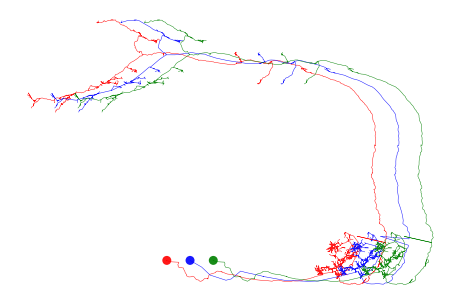

In [13]:
import matplotlib.pyplot as plt

# Plot an original neuron first
fig, ax = nl[0].plot2d(color='red')

# Shift the downsampled and resampled versions slightly and plot
n_ds = nl_downsampled[0].copy()
n_rs = nl_resampled[0].copy()

n_ds.nodes.x += 10000
n_rs.nodes.x += 20000

fig, ax = n_ds.plot2d(color='blue', ax=ax)
fig, ax = n_rs.plot2d(color='green', ax=ax)

plt.show()

In [3]:
n = nl[0]
cut_node_id = n.nodes.node_id.values[333]
distal, proximal = navis.cut_neuron(n, cut_node_id)

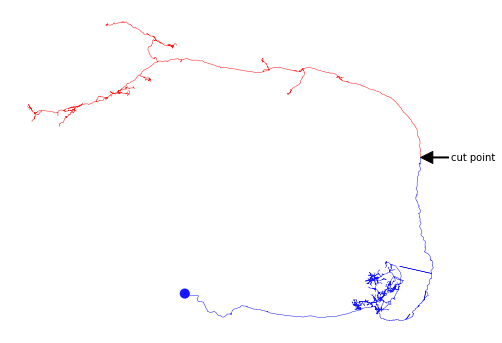

In [19]:
fig, ax = distal.plot2d(color='red', method='2d')
fig, ax = proximal.plot2d(color='blue', method='2d', ax=ax)

# Annotate cut point
cut_coords = distal.nodes.set_index('node_id').loc[distal.root, ['x', 'y']].values[0]
ax.annotate('cut point',
            xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0]+20000, -cut_coords[1]), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

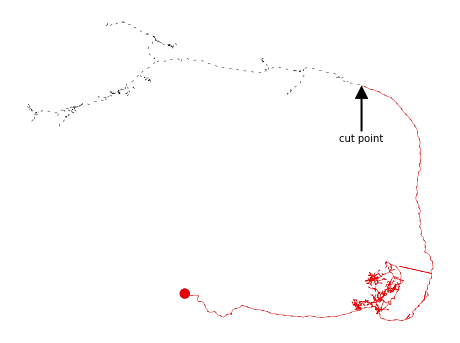

In [4]:
cut_node_id = 900
n_pruned = n.prune_distal_to(cut_node_id, inplace=False)

cut_coords = n.nodes.set_index('node_id').loc[cut_node_id, ['x', 'y']].values

# Plot original neuron in black and with dotted line
fig, ax = n.plot2d(color='black', method='2d', linestyle=(0, (5, 10)))

# Plot pruned neuron in red
fig, ax = n_pruned.plot2d(color='red', method='2d', ax=ax)

# Annotate cut point
ax.annotate('cut point',
            xy=(cut_coords[0], -cut_coords[1]), 
            xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
            arrowprops=dict(facecolor='black', shrink=0.01, width=1),
            )

plt.show()

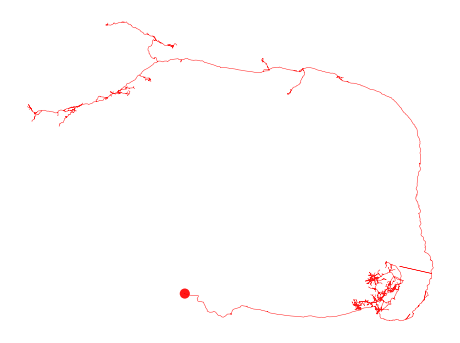

In [12]:
n_pruned.reload(inplace=False)
fig, ax = n_pruned.plot2d(color='red')

In [13]:
n = nl[0]
branch_points = n.nodes[n.nodes.type=='branch'].node_id.values

cut = navis.cut_neuron(n, branch_points)
cut.head()

,type,name,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma
0,TreeNeuron,neuron_38885,19,0,0,2,3019.190124,None
1,TreeNeuron,neuron_38885,34,0,0,2,9086.885177,None
2,TreeNeuron,neuron_38885,82,0,0,2,16403.683555,None
3,TreeNeuron,neuron_38885,21,0,0,2,3641.795499,None
4,TreeNeuron,neuron_38885,16,0,0,2,3131.722862,None


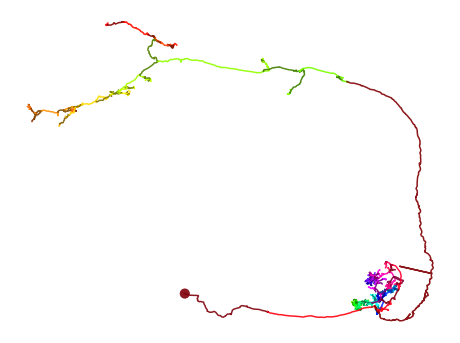

In [14]:
# Plot neuron fragments
fig, ax = navis.plot2d(cut, linewidth=1.5)

plt.show()

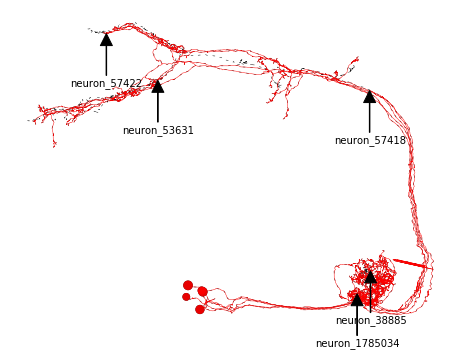

In [5]:
# Reroot to soma
nl.reroot(nl.soma, inplace=True)

# Get some random cut nodes
cut_node_ids = [n.nodes.sample(1).iloc[0].node_id for n in nl]

# Prune the neurons
nl_pruned = nl.prune_distal_to(cut_node_ids, inplace=False)

# Plot original neurons in black
fig, ax = nl.plot2d(color='black', method='2d', linestyle=(0, (5, 10)))

# Plot pruned neurons in red
fig, ax = nl_pruned.plot2d(color='red', method='2d', ax=ax)

# Annotate cut points
for i, c in enumerate(cut_node_ids):
    cut_coords = nl[i].nodes.set_index('node_id').loc[c, ['x', 'y']].values
    ax.annotate(nl[i].name, xy=(cut_coords[0], -cut_coords[1]), 
                xytext=(cut_coords[0], -cut_coords[1]-20000), va='center', ha='center',
                arrowprops=dict(facecolor='black', shrink=0.01, width=.5),
                )

plt.show()

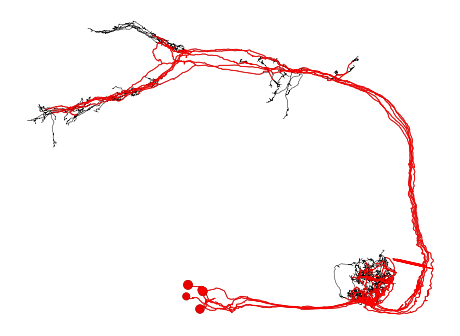

In [9]:
# This will prune the three terminal branches
nl_pruned = nl.prune_by_strahler(to_prune = [1,2], inplace=False)

# Plot original neurons in black
fig, ax = nl.plot2d(color='black', method='2d')

# Plot pruned neurons in red
fig, ax = nl_pruned.plot2d(color='red', method='2d', ax=ax, linewidth=1)

plt.show()

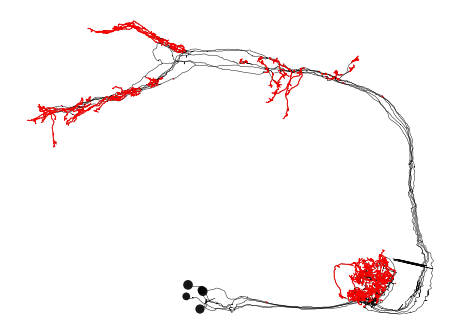

In [15]:
# This will prune the three terminal branches
nl_pruned = nl.prune_by_strahler(to_prune = range(3, 100), inplace=False)

# Plot original neurons in black
fig, ax = nl.plot2d(color='black', method='2d')

# Plot pruned neurons in red
fig, ax = nl_pruned.plot2d(color='red', method='2d', ax=ax, linewidth=1)

plt.show()

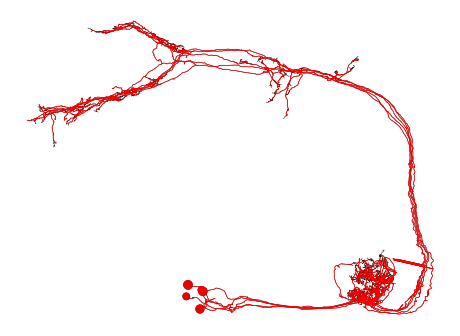

In [11]:
# This will prune all branches smaller than 5microns
nl_pruned = nl.prune_twigs(size=5000, inplace=False)

# Plot original neurons in black
fig, ax = nl.plot2d(color='black', method='2d')

# Plot pruned neurons in red
fig, ax = nl_pruned.plot2d(color='red', method='2d', ax=ax, linewidth=.75)

plt.show()

In [3]:
# Get a volume
lh = navis.example_volume('LH')

# Prune by volume
nl_lh = nl.prune_by_volume(lh, inplace=False)

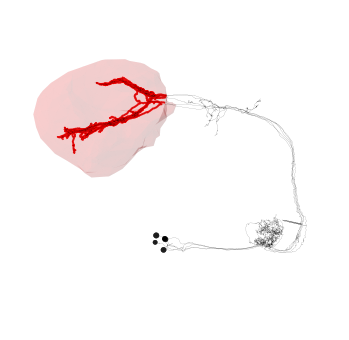

In [12]:
# Plot original neurons
fig, ax = navis.plot2d(nl, method='3d', linewidth=.1, color='k')

# Add pruned branches in red
fig, ax = navis.plot2d([nl_lh[nl_lh.cable_length > 10], lh], 
                        method='3d', ax=ax, c='r',
                        linewidth=2)

ax.dist=6
plt.show()

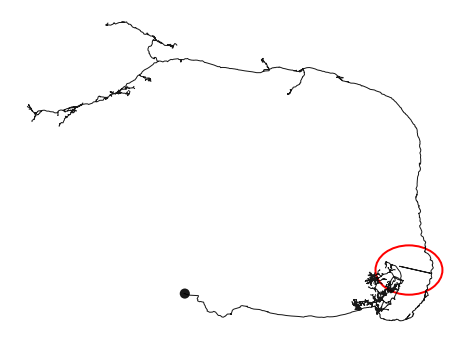

In [18]:
n = nl[0]

fig, ax = n.plot2d(linewidth=1, c='k')

c = plt.Circle((.9,.2),.075, color='r', linewidth=2,
               fill=False, transform=ax.transAxes)
ax.add_artist(c)

plt.show()

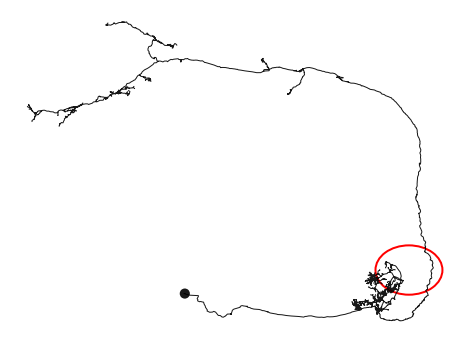

In [20]:
despiked = navis.despike_neuron(n, inplace=False)

fig, ax = despiked.plot2d(linewidth=1, c='k')

c = plt.Circle((.9,.2),.075, color='r', linewidth=2,
               fill=False, transform=ax.transAxes)
ax.add_artist(c)

plt.show()

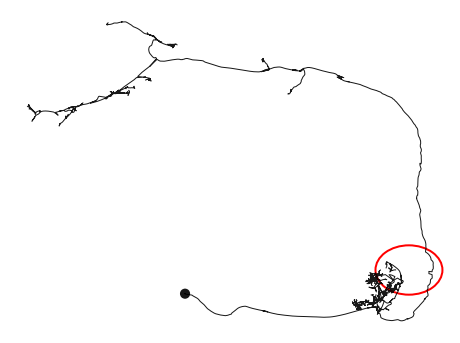

In [22]:
smoothed = navis.smooth_neuron(n, window=10, inplace=False)

fig, ax = smoothed.plot2d(linewidth=1, c='k')

c = plt.Circle((.9,.2),.075, color='r', linewidth=2,
               fill=False, transform=ax.transAxes)
ax.add_artist(c)

plt.show()

In [23]:
# Resample to 10um
resampled = navis.resample_neuron(n, 10000, inplace=False)

# Downsample by factor 10
downsampled = navis.downsample_neuron(n, 10, inplace=False)

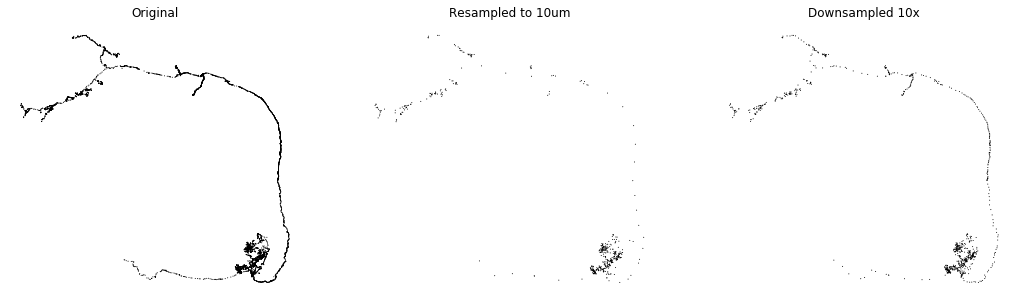

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

_ = navis.plot2d(n.nodes[['x', 'y', 'z']].values,
                  ax=axes[0])

_ = navis.plot2d(resampled.nodes[['x', 'y', 'z']].values,
                  ax=axes[1])

_ = navis.plot2d(downsampled.nodes[['x', 'y', 'z']].values,
                  ax=axes[2])

for ax, title in zip(axes, ['Original', 'Resampled to 10um', 'Downsampled 10x']):
    ax.set_title(title)
    ax.set_axis_off()

plt.show()

In [78]:
import numpy as np

# Get nodes but remove the root (has no parent)
nodes = nl[0].nodes[nl[0].nodes.parent_id > 0]

# Get the x/y/z coordinates of all nodes (except root)
node_locs = nodes[['x', 'y', 'z']].values

# For each node, get its parent's location
parent_locs = nl[0].nodes.set_index('node_id').loc[nodes.parent_id.values, ['x', 'y', 'z']].values

# Calculate Eucledian distances
distances = np.sqrt(np.sum((node_locs - parent_locs)**2, axis=1))

print(f'Mean distance between nodes: {np.mean(distances):.2f} (+/- {np.std(distances):.2f}) nm')

Mean distance between nodes: 190.66 (+/- 317.05) nm


In [118]:
n = nl[0]

end = n.nodes[n.nodes.type == 'end'].node_id.values[0]

d_geo = navis.dist_between(n, n.soma, end)

print(f'Eucledian distance between soma and terminal node {end}: {d_geo:.2f}')

Eucledian distance between soma and terminal node 1526: 460477.85


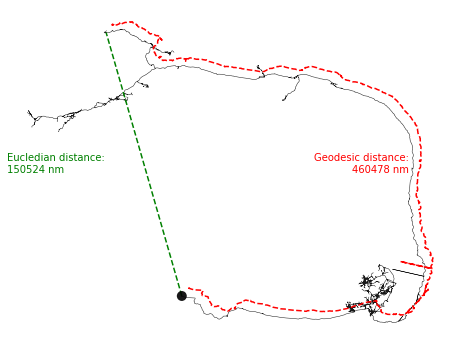

In [126]:
import networkx as nx

# First we need to find the path between the soma and the terminal node
path = nx.shortest_path(n.graph.to_undirected(), n.soma[0], end)

# Get coordinates for the path
path_co = n.nodes.set_index('node_id').loc[path, ['x', 'y', 'z']].copy()

# Add a small offset
path_co.x += 3000
path_co.y -= 3000

# Plot neuron
fig, ax = navis.plot2d(n, c='k')

# Add geodesic path
ax.plot(path_co.x, -path_co.y, c='r', ls='--')

# Add Eucledian path
end_loc = n.nodes.set_index('node_id').loc[end, ['x', 'y', 'z']]
soma_loc = n.nodes.set_index('node_id').loc[n.soma[0], ['x', 'y', 'z']]
ax.plot([soma_loc.x, end_loc.x], [-soma_loc.y, -end_loc.y], c='g', ls='--')

d_eucl = np.sqrt(np.sum((end_loc - soma_loc)**2))

# Annotate distances
_ = ax.text(x=0, y=.5, s=f'Eucledian distance:\n{d_eucl:.0f} nm', transform=ax.transAxes, c='g')
_ = ax.text(x=.9, y=.5, s=f'Geodesic distance:\n{d_geo:.0f} nm', transform=ax.transAxes, c='r', ha='right')

In [129]:
# Calculate distances from all end nodes to all other nodes
ends = n.nodes[n.nodes.type=='end'].node_id.values
m = navis.geodesic_matrix(n, tn_ids=ends)

# Subset to only end-nodes-to-end_nodes
m = m.loc[ends, ends]

m.head()

,1526,2424,2754,2974,3167,3357,3490,3619,3746,3872,...,6355,6357,6358,6359,6360,6361,6362,6363,6364,6365
1526,0.000000,437041.283210,136020.020215,439403.773433,112592.091434,111337.335220,460477.851001,432274.175467,433983.630871,435264.607278,...,414668.843149,415753.378962,438438.498692,435561.682920,427720.497949,424799.016770,430784.009097,428519.808799,417208.514925,413753.326016
2424,437041.283210,0.000000,350525.681413,61914.355531,358146.413208,448578.122754,155004.635320,54784.757565,56494.212969,75996.534555,...,55400.770425,38263.961060,60949.080790,8194.507894,50231.080046,47309.598867,53294.591195,51030.390897,39719.097023,36263.908114
2754,136020.020215,350525.681413,0.000000,352888.171636,57125.150212,147556.859758,373962.249204,345758.573670,347468.029074,348749.005481,...,328153.241351,329237.777165,351922.896895,349046.081123,341204.896151,338283.414972,344268.407300,342004.207002,330692.913128,327237.724219
2974,439403.773433,61914.355531,352888.171636,0.000000,360508.903431,450940.612976,157367.125543,48008.531143,54427.142775,78359.024778,...,57763.260648,36196.890866,5827.830428,60434.755241,13393.111734,14952.440428,51227.521001,48963.320703,32942.870600,29487.681691
3167,112592.091434,358146.413208,57125.150212,360508.903431,0.000000,124128.930978,381582.980999,353379.305465,355088.760869,356369.737276,...,335773.973146,336858.508960,359543.628690,356666.812918,348825.627946,345904.146767,351889.139095,349624.938797,338313.644923,334858.456014


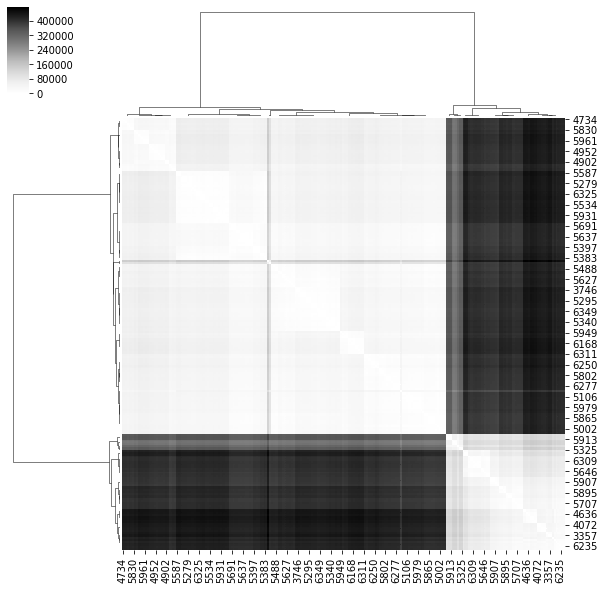

In [139]:
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

# geodesic_matrix() returns sparse matrices to keep memory consumption low
# We have to convert for plotting
m_dense = m.to_dense()

# Generate a linkage from the distances
Z = linkage(squareform(m_dense, checks=False), method='ward')

# Plot
cm = sns.clustermap(m_dense, cmap='Greys', col_linkage=Z, row_linkage=Z)